In [7]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
train=pd.read_csv("../Data/digit/train.csv")
train.head()
test=pd.read_csv("../Data/digit/test.csv")
test.head()

#generating xtrain,ytrain from train data
xtrain=train.drop(columns="label").values
ytrain=train["label"].values
xtest=test.values

In [15]:
xtrain.shape

(42000, 784)

In [16]:
ytrain.shape

(42000,)

In [17]:
xtest.shape

(28000, 784)

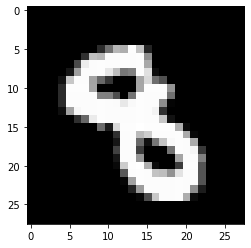

In [23]:
plt.imshow(xtrain[67].reshape(28,28),cmap="gray")

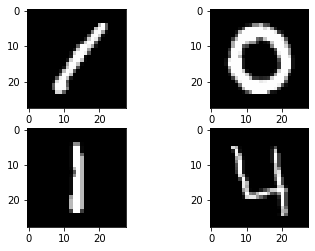

In [25]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(xtrain[i].reshape(28,28),cmap="gray")

### Scaling of data with Standard Scaler

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtrain)
sc_xtrain=sc.transform(xtrain)
sc_test=sc.transform(xtest)

### PCA transformation of Data

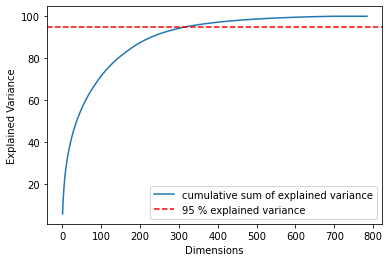

In [27]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(sc_xtrain)
val=np.cumsum(pca.explained_variance_ratio_)*100
plt.plot(range(1,len(val)+1),val,label="cumulative sum of explained variance")
plt.axhline(y=95,color="r",linestyle="--",label="95 % explained variance")
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.legend()

In [30]:
pca=PCA(n_components=0.95)
pca.fit(sc_xtrain)
pca_xtrain=pca.transform(sc_xtrain)
pca_xtest=pca.transform(sc_test)
print("Selected Components :",pca.n_components_)

Selected Components : 320


### Visualization data before PCA and After PCA

Text(0.5, 1.0, 'Data After PCA')

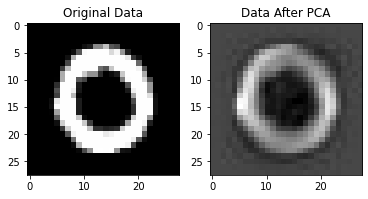

In [39]:
data_point=xtrain[1].reshape(28,28)
pca_data_point=pca.inverse_transform(pca_xtrain[1]).reshape(28,28)
plt.subplot(1,2,1)
plt.imshow(data_point,cmap="gray")
plt.title("Original Data")
plt.subplot(1,2,2)
plt.imshow(pca_data_point,cmap="gray")
plt.title("Data After PCA")

## Classification of Handwritten Digits data using Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
start_time=datetime.datetime.now()
model.fit(pca_xtrain,ytrain)
end_time=datetime.datetime.now()
print("Time Taken by model to train data is : ",str(end_time-start_time))

Time Taken by model to train data is :  0:00:09.394154


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
start_time=datetime.datetime.now()
ypred=model.predict(pca_xtrain)
end_time=datetime.datetime.now()
print("Time Taken by model to Predict the output on test data is : ",str(end_time-start_time))

Time Taken by model to Predict the output on test data is :  0:00:00.079822


Accuracy is  0.9383333333333334
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4132
           1       0.97      0.98      0.97      4684
           2       0.93      0.93      0.93      4177
           3       0.92      0.91      0.92      4351
           4       0.95      0.94      0.94      4072
           5       0.91      0.90      0.90      3795
           6       0.96      0.97      0.96      4137
           7       0.95      0.94      0.95      4401
           8       0.91      0.90      0.91      4063
           9       0.92      0.92      0.92      4188

    accuracy                           0.94     42000
   macro avg       0.94      0.94      0.94     42000
weighted avg       0.94      0.94      0.94     42000



<AxesSubplot:>

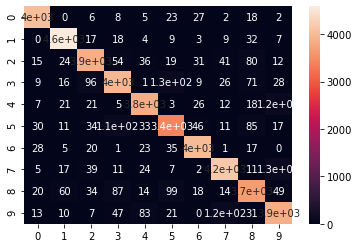

In [43]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy is ",accuracy_score(ytrain,ypred))
print(classification_report(ytrain,ypred))
cm=confusion_matrix(ytrain,ypred)
sns.heatmap(cm,annot=True)

In [44]:
start_time=datetime.datetime.now()
ypred=model.predict(pca_xtest)
end_time=datetime.datetime.now()
print("Time Taken by model to Predict the output on test data is : ",str(end_time-start_time))

Time Taken by model to Predict the output on test data is :  0:00:00.039867


In [49]:
output=pd.DataFrame(ypred,columns=["label"])
output.to_csv("../Data/digit/test_labels.csv")